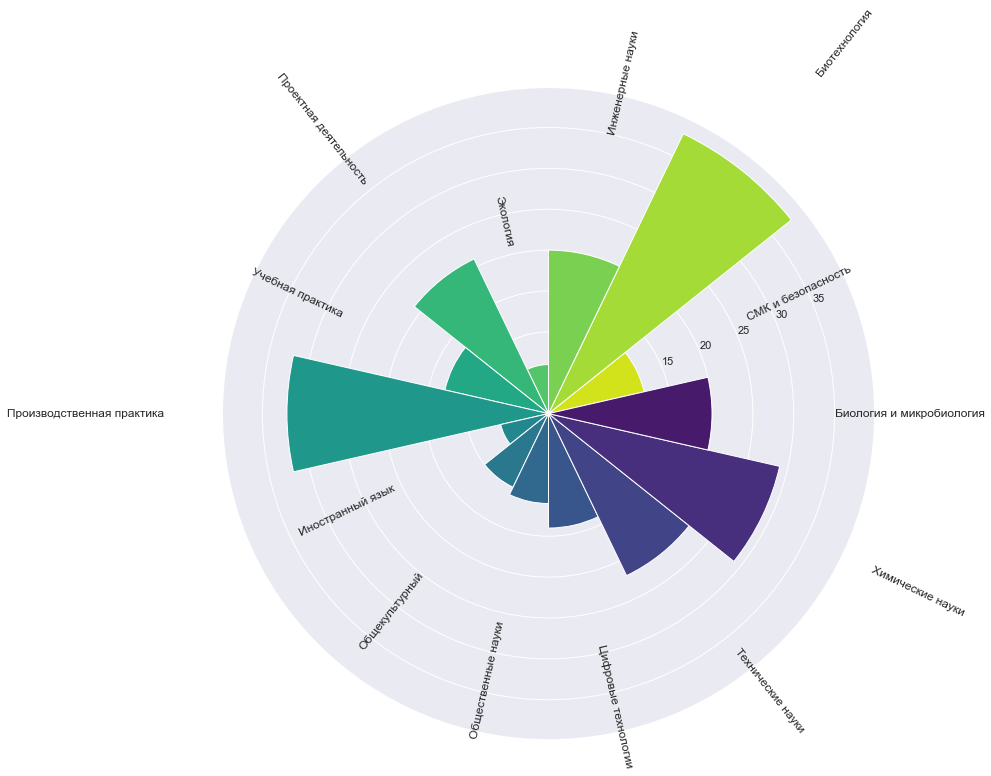

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

sns.set() #make the plots look pretty

# данные
data_v1 = {
    'Общеуниверситетский блок': {
        'Иностранный язык': 6,
        'Общекультурный': 10,
        'Общественные науки': 11
    },
    'Общепрофессиональный блок': {
        'Цифровые технологии': 14,
        'Технические науки': 22,
        'Химические науки': 29,
        'Биология и микробиология': 20
    },
    'Специализированный блок': {
        'СМК и безопасность': 12,
        'Биотехнология': 38,
        'Инженерные науки': 20,
        'Экология': 6
    },
    'Практическая подготовка': {
        'Учебная практика': 13,
        'Производственная практика': 32
    },
    'Проектная деятельность': {
        'Проектная деятельность': 21
    }
}


data_v2 = {
    'Иностранный язык': 6,
    'Общекультурный': 10,
    'Общественные науки': 11,
    'Цифровые технологии': 14,
    'Технические науки': 22,
    'Химические науки': 29,
    'Биология и микробиология': 20,
    'СМК и безопасность': 12,
    'Биотехнология': 38,
    'Инженерные науки': 20,
    'Экология': 6,
    'Учебная практика': 13,
    'Производственная практика': 32,
    'Проектная деятельность': 21
}

data_v3 = {
    'subjects' : {
        'Иностранный язык',
        'Общекультурный',
        'Общественные науки',
        'Цифровые технологии',
        'Технические науки',
        'Химические науки',
        'Биология и микробиология',
        'СМК и безопасность',
        'Биотехнология',
        'Инженерные науки',
        'Экология',
        'Учебная практика',
        'Производственная практика',
        'Проектная деятельность'
    },
    'marks': {
        6,
        10,
        11,
        14,
        22,
        29,
        20,
        12,
        38,
        20,
        6,
        13,
        32,
        21
    }
}

subjects = [
        'Иностранный язык',
        'Общекультурный',
        'Общественные науки',
        'Цифровые технологии',
        'Технические науки',
        'Химические науки',
        'Биология и микробиология',
        'СМК и безопасность',
        'Биотехнология',
        'Инженерные науки',
        'Экология',
        'Учебная практика',
        'Производственная практика',
        'Проектная деятельность'
]
marks = [
        6,
        10,
        11,
        14,
        22,
        29,
        20,
        12,
        38,
        20,
        6,
        13,
        32,
        21
]
groups = [
    'Общеуниверситетский блок',
    'Общеуниверситетский блок',
    'Общеуниверситетский блок',
    'Общепрофессиональный блок',
    'Общепрофессиональный блок',
    'Общепрофессиональный блок',
    'Общепрофессиональный блок',
    'Специализированный блок',
    'Специализированный блок',
    'Специализированный блок',
    'Специализированный блок',
    'Практическая подготовка',
    'Практическая подготовка',
    'Проектная деятельность'
]

# создание типа данных датафрейм из единого словаря
def making_dataframe_v1(data):
    return pd.DataFrame(zip(data_v3['subjects'], data_v3['marks']), columns = ['subject', 'mark'])

# создание типа данных датафрейм из списков
def making_dataframe_v2(marks, subjects):
    return pd.DataFrame(zip(subjects, marks), columns = ['subject', 'mark'])

# создание типа данных датафрейм из списков с группами
def making_dataframe_v3(marks, subjects, groups):
    return pd.DataFrame(zip(subjects, marks, groups), columns = ['subject', 'mark', 'group'])

# группировка датафрейма
def grouping_dataframe(dataframe):
    return dataframe.groupby('group')

# сортировка датафрейма
def sorting_dataframe(dataframe):
    return dataframe.sort_values(by='group', ascending=False)

# получаем цвета для графика
def get_color(name, number):
    pal = list(sns.color_palette(palette=name, n_colors=number).as_hex())
    return pal

# рисуем радиальную диаграмму
def draw(dataframe):
    # получаем цвета
    pal_vi = get_color('viridis_r', len(dataframe))
    pal_plas = get_color('plasma_r', len(dataframe))
    pal_spec = get_color('Spectral', len(dataframe))
    pal_hsv = get_color('hsv', len(dataframe))
    
    plt.figure(figsize=(12,12))
    ax = plt.subplot(111, polar=True)
    plt.axis()
    
    # Установим минимальное и максимальное значение
    lowerLimit = 0
    max_v = dataframe['mark'].max()

    # Установим высоту и ширину
    heights = dataframe['mark']
    width = 2*np.pi / len(dataframe.index)

    # Установим индекс и угол
    indexes = list(range(1, len(dataframe.index)+1))
    angles = [element * width for element in indexes]

    bars = ax.bar(x=angles, height=heights, width=width, bottom=lowerLimit,
                  linewidth=1, edgecolor="white", color=pal_vi)
    labelPadding = 15

    for bar, angle, height, label in zip(bars,angles, heights, dataframe['subject']):
        rotation = np.rad2deg(angle)
        alignment = ""
        # Разберемся с направлением
        if angle >= np.pi/2 and angle < 3*np.pi/2:
            alignment = "right"
            rotation = rotation + 180
        else: 
            alignment = "left"
        ax.text(x=angle, y=lowerLimit + bar.get_height() + labelPadding,
                s=label, ha=alignment, va='center', rotation=rotation, 
                rotation_mode="anchor")
        ax.set_thetagrids([], labels=[])
    # сохранение графика
    plt.savefig('scheme.png', dpi = 1000)
    # отрисовка
    plt.show()

# вызов функций
# print(data_v3)
# dataframe = making_dataframe_v1(data_v3)

dataframe = making_dataframe_v3(marks, subjects, groups)
dataframe_sorted = sorting_dataframe(dataframe)
# dataframe_grouped = grouping_dataframe(dataframe)
draw(dataframe_sorted)